# Purpose:

2015-01-28

Generate descriptive statistics and figures of the LD results as a whole rather than by contig where possible

# Implementation:

## Imports:

In [1]:
# plotting imports
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import ggplot as gp

In [2]:
import numpy as np
import pandas as pd
# import tables as h5

## File paths:

In [3]:
# define paths to files
ld_table = "/home/gus/remote_mounts/louise/data/genomes/glossina_fuscipes/annotations/SNPs/plink_out/tsetseFINAL_14Oct2014_f2_53.recode.renamed_scaffolds.maf0_05.vcf/ld/r_none_freqs_dprime.ld"

# LD_22 = "/home/gus/remote_mounts/louise/data/dummy_datasets/linkage_diseq/hapmap/ld_chr22_MEX.txt"

In [4]:
ld = pd.read_table(ld_table, sep=" +")

/home/gus/.virtualenvs/py279/lib/python2.7/site-packages/pandas/io/parsers.py:639: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators; you can avoid this warning by specifying engine='python'.
  ParserWarning)


In [5]:
ld.head()

,CHR_A,BP_A,SNP_A,MAF_A,CHR_B,BP_B,SNP_B,MAF_B,R,DP
0,Scaffold0,13388,.,0.278846,Scaffold0,23408,.,0.298077,1.000000,1
1,Scaffold0,13388,.,0.278846,Scaffold0,23418,.,0.298077,1.000000,1
2,Scaffold0,13388,.,0.278846,Scaffold0,23421,.,0.298077,1.000000,1
3,Scaffold0,13388,.,0.278846,Scaffold0,23431,.,0.288462,0.975946,1
4,Scaffold0,13388,.,0.278846,Scaffold0,30544,.,0.094340,0.464238,1


In [6]:
ld['R2'] = ld.R**2
ld['BP_DELTA'] = abs(ld.BP_A - ld.BP_B)

In [7]:
ld.head()

,CHR_A,BP_A,SNP_A,MAF_A,CHR_B,BP_B,SNP_B,MAF_B,R,DP,R2,BP_DELTA
0,Scaffold0,13388,.,0.278846,Scaffold0,23408,.,0.298077,1.000000,1,1.000000,10020
1,Scaffold0,13388,.,0.278846,Scaffold0,23418,.,0.298077,1.000000,1,1.000000,10030
2,Scaffold0,13388,.,0.278846,Scaffold0,23421,.,0.298077,1.000000,1,1.000000,10033
3,Scaffold0,13388,.,0.278846,Scaffold0,23431,.,0.288462,0.975946,1,0.952471,10043
4,Scaffold0,13388,.,0.278846,Scaffold0,30544,.,0.094340,0.464238,1,0.215517,17156


# Basic Descriptive Plots:

### LD as r:

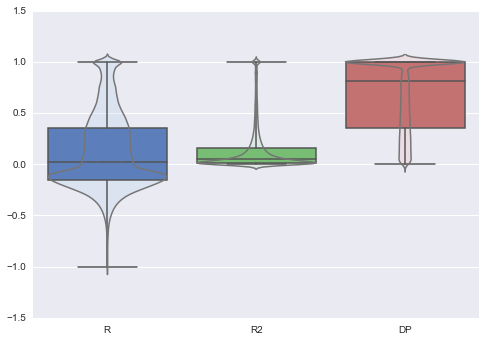

In [8]:
ld_no_na = ld.dropna()
sns.boxplot(ld_no_na[['R','R2','DP']], whis=np.inf, color='muted', );
sns.violinplot(ld_no_na[['R','R2','DP']], color='pastel', alpha=0.2);


### LD ($r^2$) vs distance in bp for Scaffold0

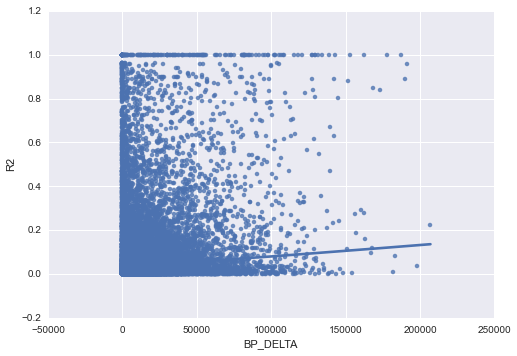

In [9]:
sns.regplot(ld.BP_DELTA[::50],
            ld.R2[::50],
            dropna=1,
            order=1,
            lowess=True);



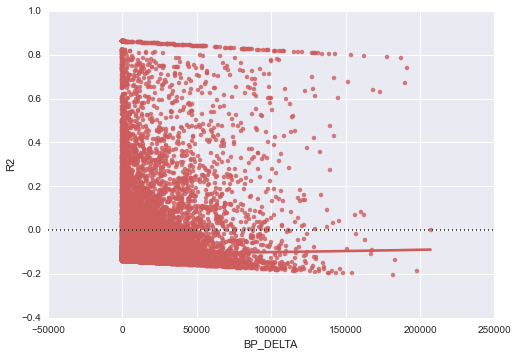

In [10]:
sns.residplot(ld.BP_DELTA[::50],
              ld.R2[::50], 
              color="indianred", 
#               order=1,
              lowess=True);

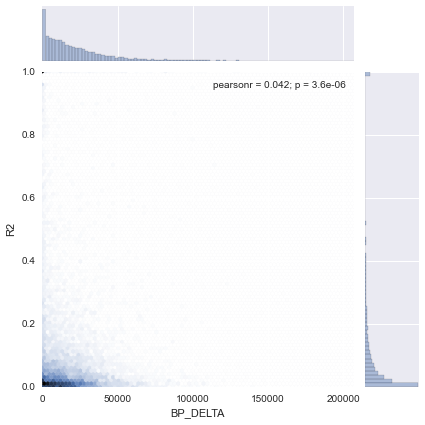

In [11]:
sns.jointplot(ld.BP_DELTA[::50],
              ld.R2[::50],
              kind='hex',
              dropna=1);


In [12]:
print "with NaN's: " + str(len(ld))
ld_data_len = len(ld.dropna())

print "no NaN's: " + str(ld_data_len)

with NaN's: 606395
no NaN's: 606351


## Average $r^2$ over various distance windows 

In [13]:
def get_snps_with_same_distance(df, d, win=100):
    lbound = d - win
    rbound = d + win
    
    if lbound < 0:
        lbound = 0
    
    return df[(df.BP_DELTA >= lbound) & (df.BP_DELTA <= rbound)]

In [14]:
d1k = get_snps_with_same_distance(df=ld, d=1000, win=100)
d1k.head()

,CHR_A,BP_A,SNP_A,MAF_A,CHR_B,BP_B,SNP_B,MAF_B,R,DP,R2,BP_DELTA
180,Scaffold0,178807,.,0.057692,Scaffold0,179784,.,0.235849,0.439852,1.000000,0.193470,977
306,Scaffold0,257313,.,0.132075,Scaffold0,258216,.,0.125000,0.872487,0.910438,0.761234,903
1522,Scaffold0,1545863,.,0.169811,Scaffold0,1546894,.,0.074468,0.458094,0.646985,0.209850,1031
1530,Scaffold0,1545872,.,0.169811,Scaffold0,1546894,.,0.074468,0.458094,0.646985,0.209850,1022
2575,Scaffold0,2584578,.,0.094340,Scaffold0,2585524,.,0.080000,1.000000,1.000000,1.000000,946


In [15]:
get_snps_with_same_distance(df=ld, d=100, win=100).R2.mean()

0.37813550801321755

In [23]:
def collect_window_means(df, upper_lim=1000, win=100):
    
    data = dict(window_mean_r2 = [], 
                d = np.array(range(upper_lim))+1)

    
    for d  in data['d']:
        data['window_mean_r2'].append(get_snps_with_same_distance(df=df, d=d-1, win=win).R2.mean())

    return data
    

In [24]:
m = pd.DataFrame(collect_window_means(df=ld, upper_lim=10000, win=5))
m.head()

,d,window_mean_r2
0,1,0.518904
1,2,0.507942
2,3,0.499507
3,4,0.491810
4,5,0.485394


In [ ]:
# sns.regplot(m.d, m.window_mean_r2, lowess=True);

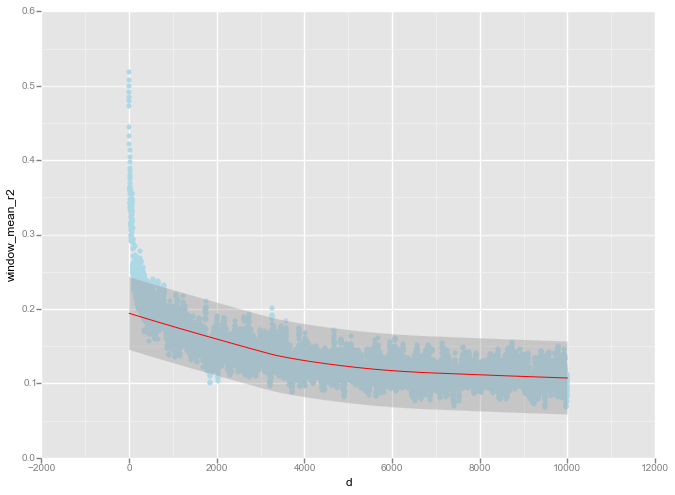

<ggplot: (8763703187129)>

In [26]:
gp.ggplot(gp.aes(x='d', y='window_mean_r2'), data=m) + \
    gp.geom_point(color='lightblue') + \
    gp.stat_smooth(span=.15, color='red', se=True)

In [ ]:
m50k = pd.DataFrame(collect_window_means(df=ld, upper_lim=50000, win=5))

In [ ]:
# I wont run this but it will show a problem where the trend climbs up and becomes erratic when distance exceeds 
# around 20 000 

# gp.ggplot(gp.aes(x='d', y='window_mean_r2'), data=m50k) + \
#     gp.geom_point(color='lightblue') + \
#     gp.stat_smooth(span=.15, color='red', se=True)

### Within 1kb

### Within 10kb

### Within 100kb